## HCP dataset exploratory data analysis (EDA) demo

In [1]:
import numpy as np
import os
import importlib
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import sklearn
from sklearn.decomposition import PCA
import torch
from torch.utils.data import Dataset, DataLoader

In [2]:
import data
import data.hcp_dataset
import data.dataset_utils
import data.data_utils
from data.hcp_dataset import *
from data.dataset_utils import *
from data.data_utils import *

import models
from models import *

import loss
from loss import *

import eval
from eval import *

In [3]:
### UNCOMMENT TO RELOAD IN PLACE WITHOUT RESTARTING KERNEL ### 
importlib.reload(data)
importlib.reload(data.hcp_dataset)
importlib.reload(data.dataset_utils)
importlib.reload(data.data_utils)
importlib.reload(models)
importlib.reload(loss)
importlib.reload(eval)

import data
import data.hcp_dataset
import data.dataset_utils
import data.data_utils
from data.hcp_dataset import *
from data.dataset_utils import *
from data.data_utils import *
import models
from models import *
import loss
from loss import *
import eval
from eval import *

### Load dataset

In [4]:
# Overall dataset storing full data structures and metadata
HCP_Dataset = HCP_Base(parcellation="Glasser", shuffle_seed=0, source="SC", target="FC", hemi="both")

# Organized partitions of the dataset and data loaders
HCP_train = HCP_Partition(HCP_Dataset, "train")
HCP_val = HCP_Partition(HCP_Dataset, "val")
HCP_test = HCP_Partition(HCP_Dataset, "test")

HCP_train_loader = DataLoader(HCP_train, batch_size=256, shuffle=False)
HCP_val_loader = DataLoader(HCP_val, batch_size=256, shuffle=False)
HCP_test_loader = DataLoader(HCP_test, batch_size=256, shuffle=False)

/ext3/miniforge3/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/ext3/miniforge3/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [5]:
HCP_Dataset.metadata_df

,subject,train_val_test,age,age_3y_bin,sex,Race_Ethnicity,Family_Relation,Family_ID
0,100206,train,27,25-27,M,White_Not Hispanic/Latino,NotTwin,56037_85858
1,100307,train,27,25-27,F,White_Not Hispanic/Latino,MZ,51488_81352
2,100408,val,33,31-33,M,White_Not Hispanic/Latino,MZ,51730_81594
3,100610,train,27,25-27,M,White_Not Hispanic/Latino,DZ,52813_82634
4,101006,val,35,34-36,F,Black or African Am._Not Hispanic/Latino,MZ,51283_52850_81149
...,...,...,...,...,...,...,...,...
952,992673,train,33,31-33,F,White_Not Hispanic/Latino,NotTwin,56143_85963
953,992774,train,35,34-36,M,White_Not Hispanic/Latino,NotTwin,51345_81210
954,993675,train,29,28-30,F,White_Not Hispanic/Latino,NotTwin,55800_85621
955,994273,train,30,28-30,M,White_Not Hispanic/Latino,NotTwin,52364_82227


In [14]:
subj_idx = 0

print("Shape of FC matrix:", HCP_Dataset.fc_matrices[subj_idx].shape)
print("Shape of FC upper triangle:", HCP_Dataset.fc_upper_triangles[subj_idx].shape)

print("Shape of SC matrix:", HCP_Dataset.sc_matrices[subj_idx].shape)  
print("Shape of SC upper triangle:", HCP_Dataset.sc_upper_triangles[subj_idx].shape)

print("Shape of SC r2t matrix:", HCP_Dataset.sc_r2t_matrices[subj_idx].shape)
print("Shape of SC r2t correlation matrix:", HCP_Dataset.sc_r2t_corr_matrices[subj_idx].shape)


Shape of FC matrix: (360, 360)
Shape of FC upper triangle: (64620,)
Shape of SC matrix: (360, 360)
Shape of SC upper triangle: (64620,)
Shape of SC r2t matrix: (360, 66)
Shape of SC r2t correlation matrix: (360, 360)


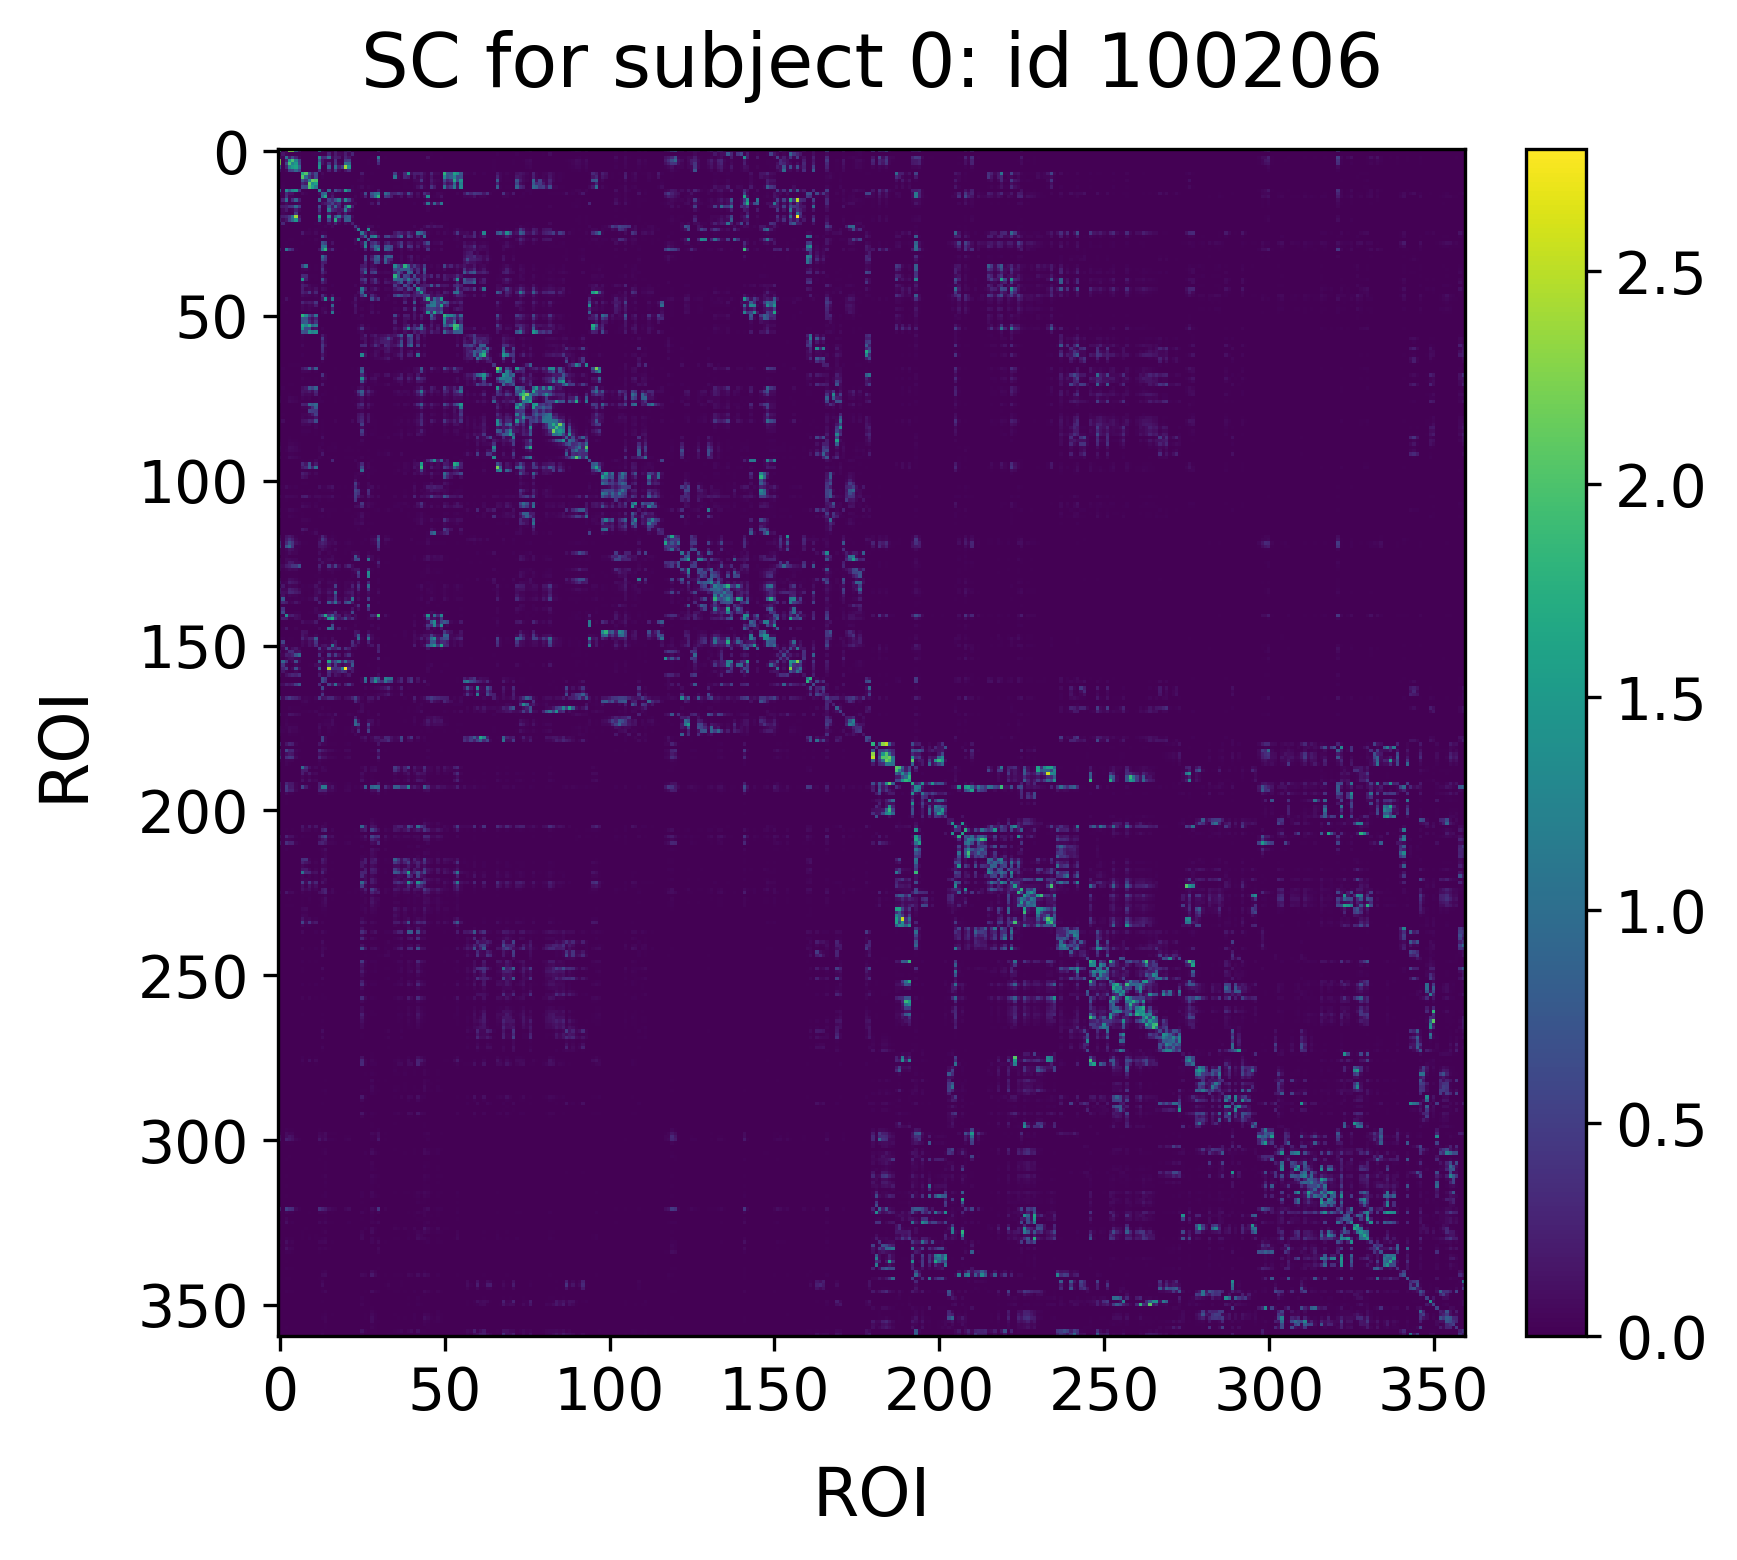

In [15]:
visualize_connectome(HCP_Dataset, modality='SC', subj_idx=0, global_fontsize=16, tick_interval=50)

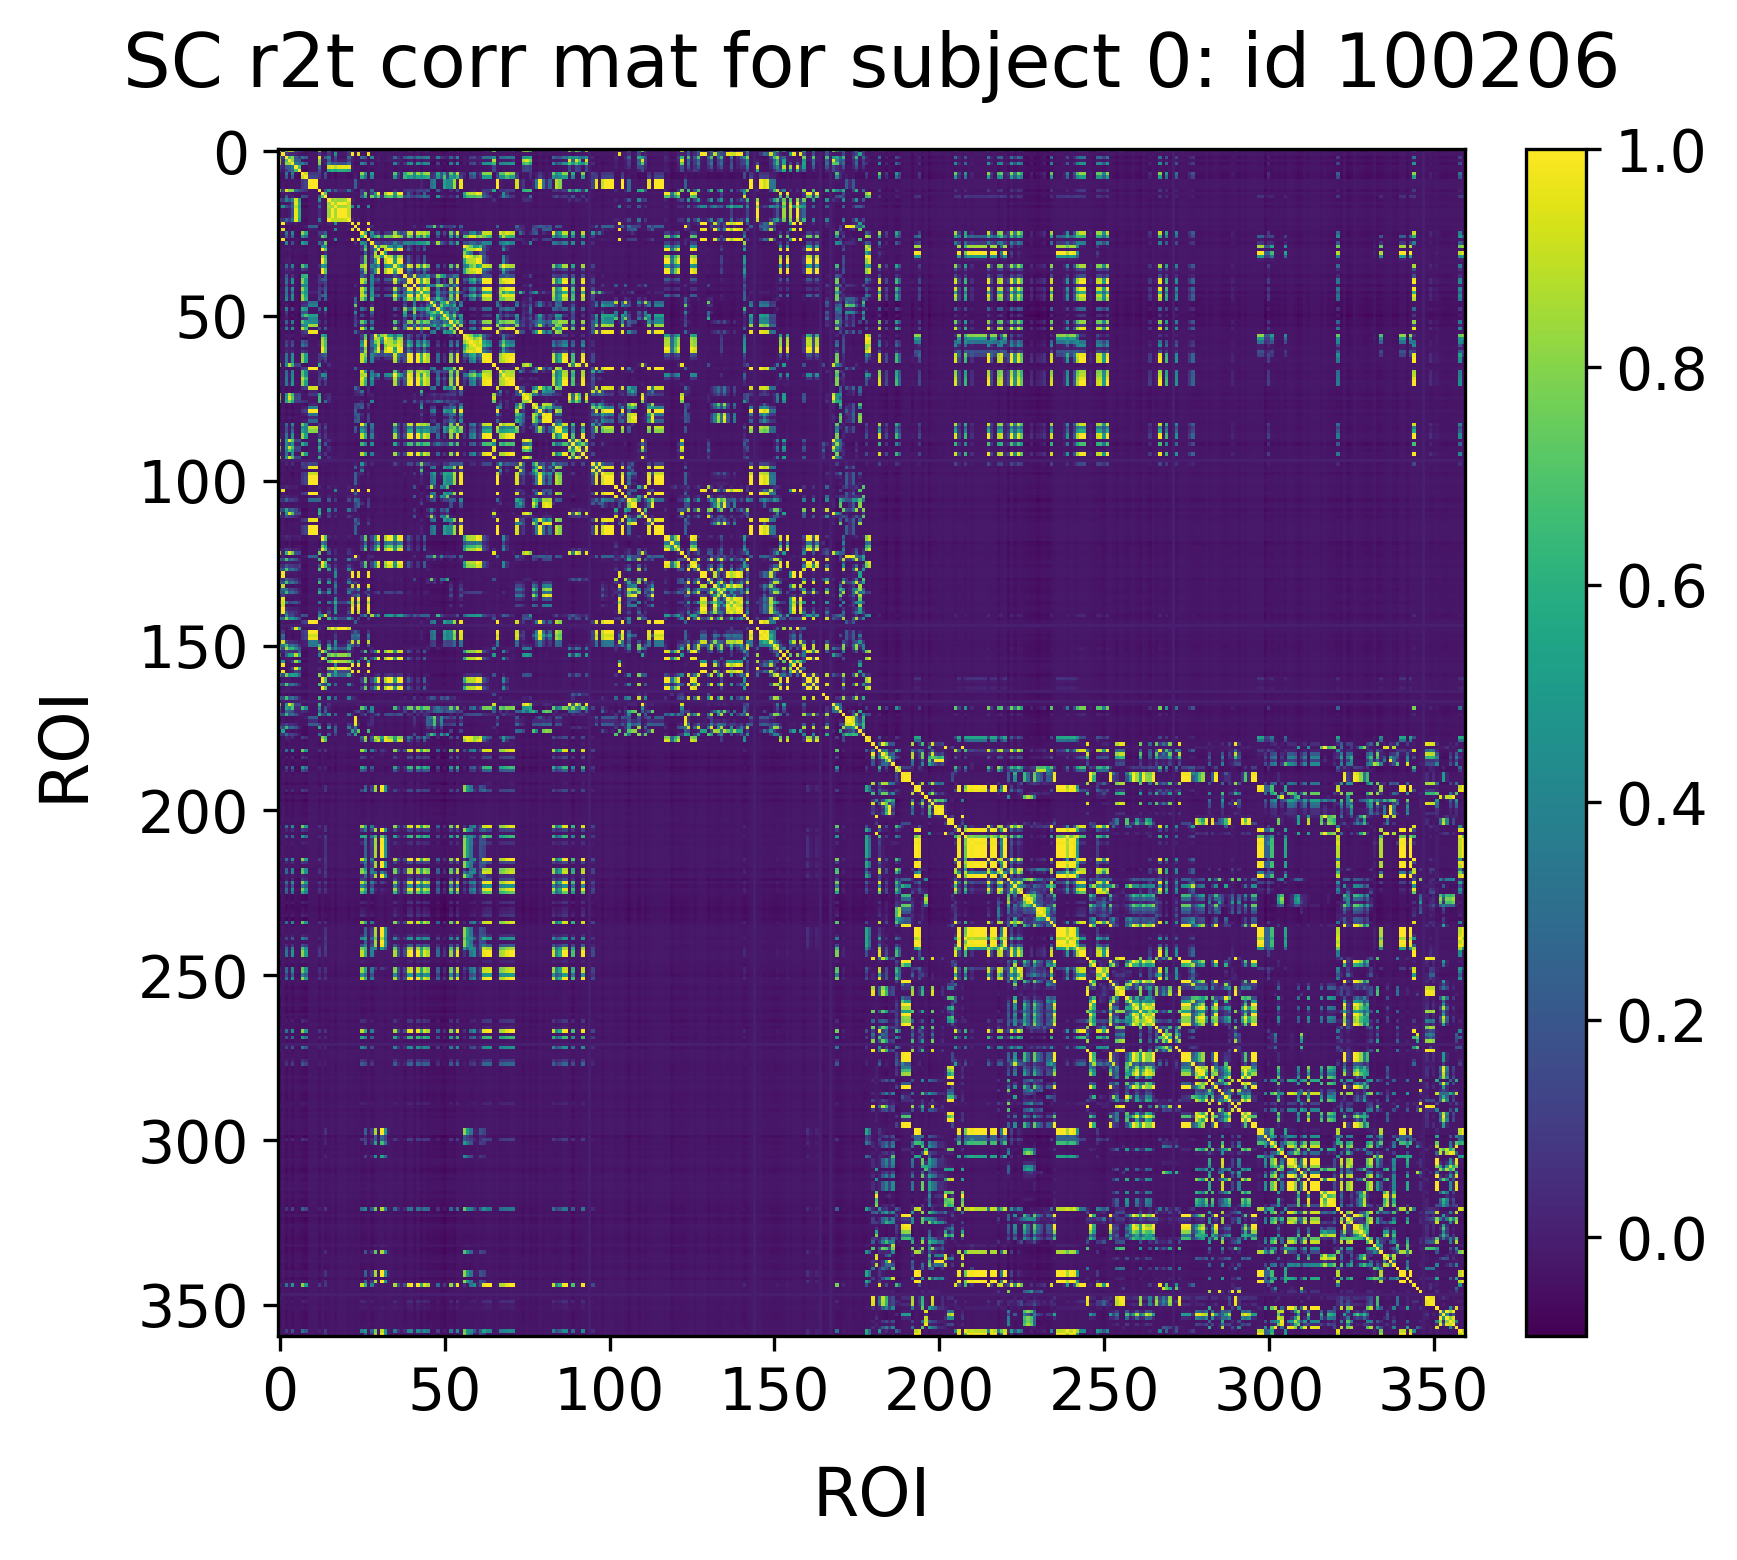

In [16]:
visualize_connectome(HCP_Dataset, modality='SC_r2t_corr', subj_idx=0)

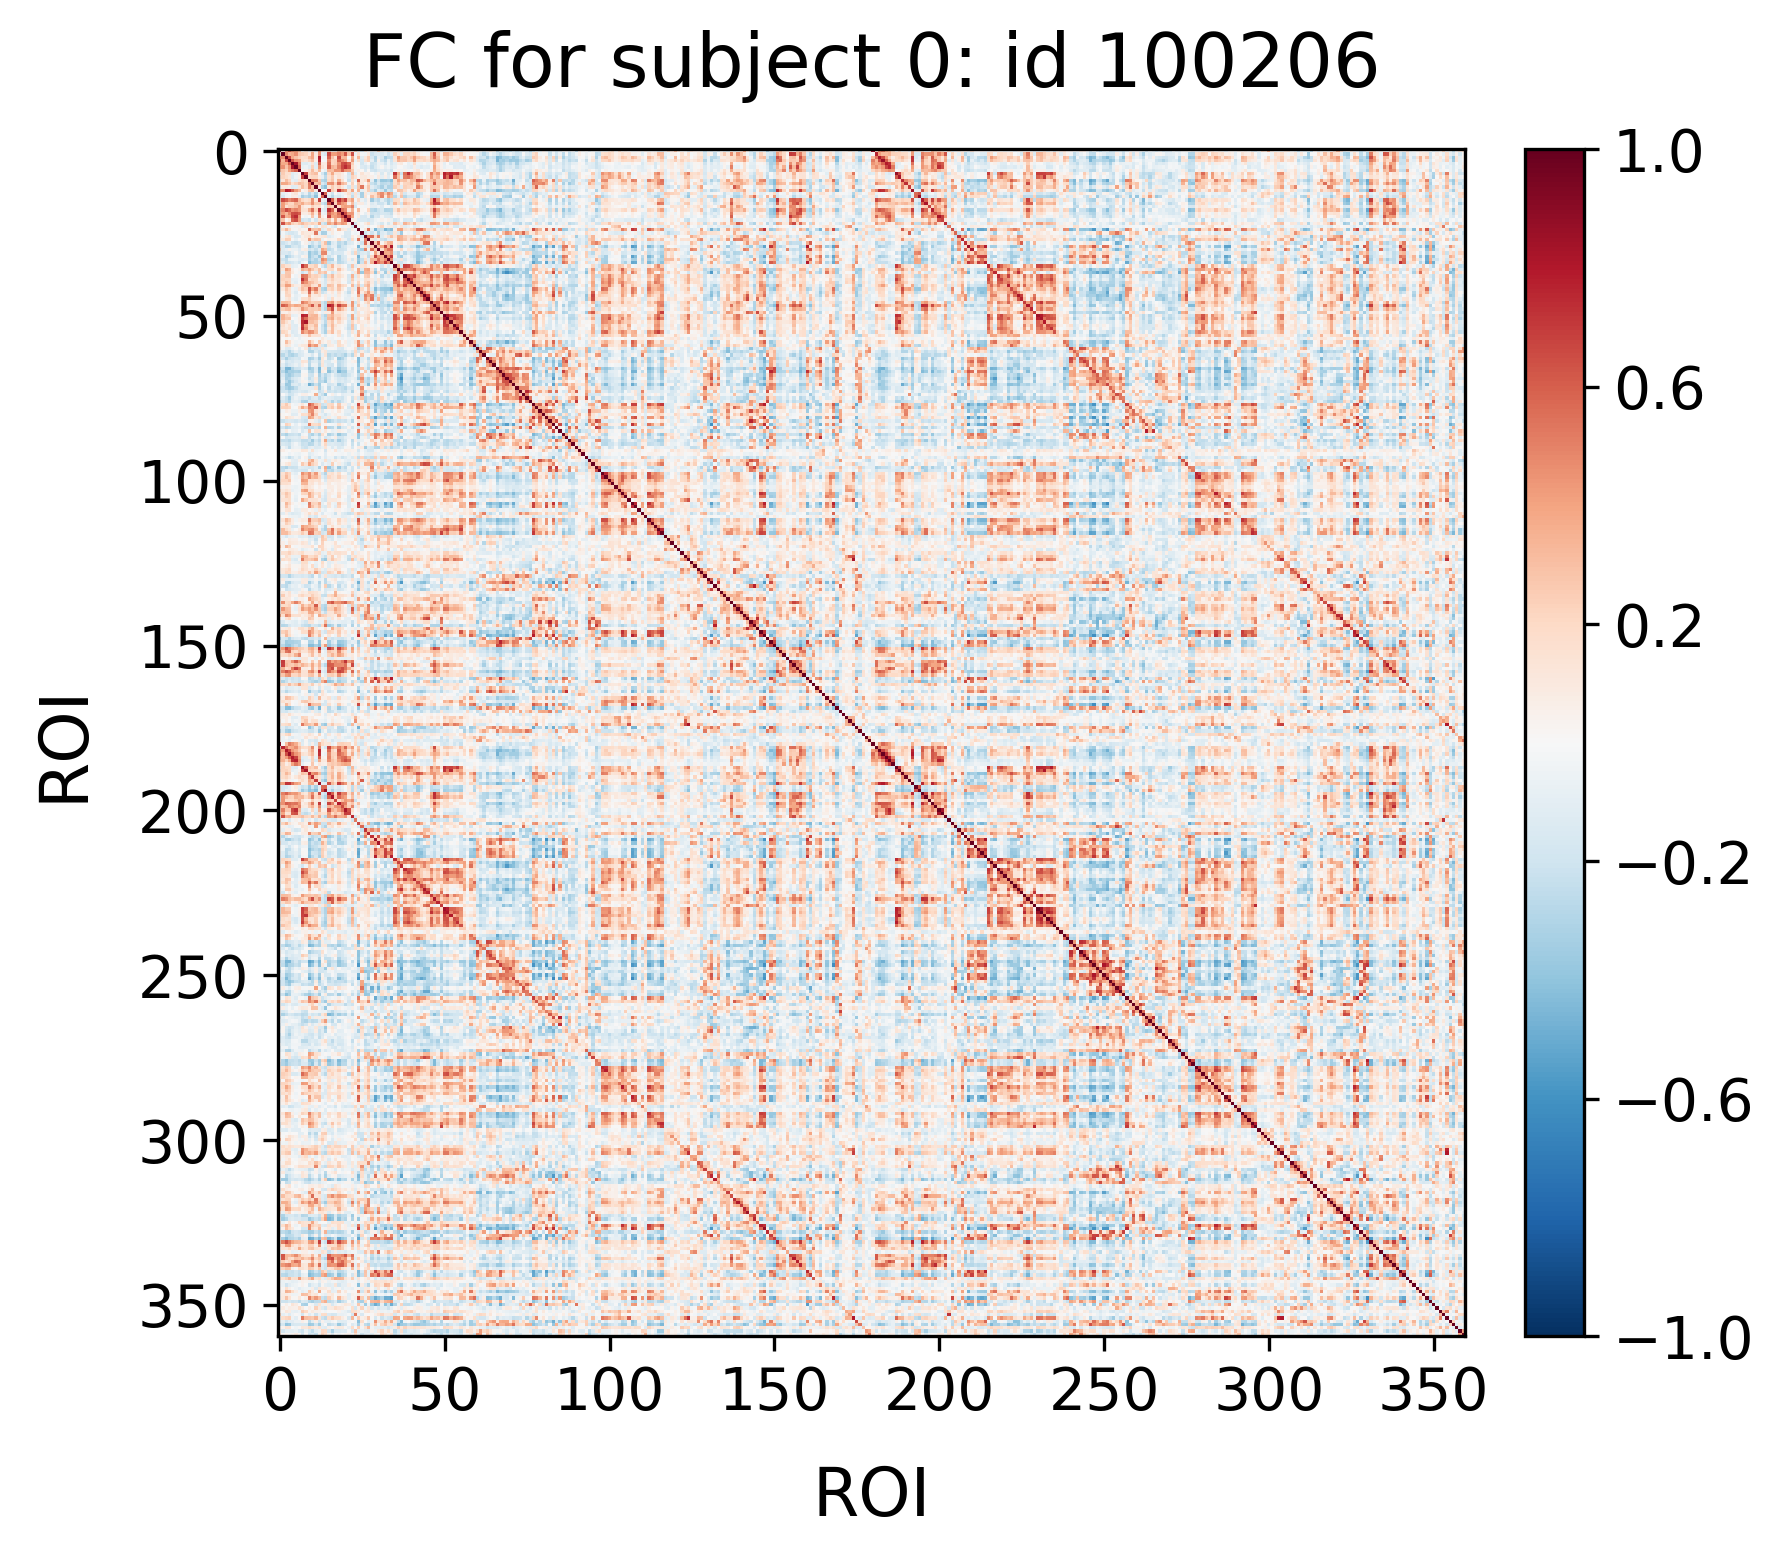

In [17]:
visualize_connectome(HCP_Dataset, modality='FC', subj_idx=0)